# Chapter 7 - How to prepare the data

In [1]:
import pandas as pd

## How to work with datetime columns

In [2]:
fires = pd.read_pickle('fires_cleaned.pkl')
fires.head()

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned
16,POWER,2004,CA,2004-10-06,2004-10-21,16823.0
17,FREDS,2004,CA,2004-10-13,2004-10-17,7700.0
25,BACHELOR,2004,NM,2004-07-20,2004-07-20,10.0
37,HOWARD GAP,2005,NC,2005-01-27,2005-01-28,50.3
39,AUSTIN CREEK,2005,NC,2005-02-12,2005-02-13,125.0


In [6]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274123 entries, 16 to 1880441
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128667 non-null  object        
 1   fire_year       274123 non-null  int64         
 2   state           274123 non-null  category      
 3   discovery_date  274123 non-null  datetime64[ns]
 4   contain_date    137376 non-null  datetime64[ns]
 5   acres_burned    274123 non-null  float64       
 6   fire_month      274123 non-null  int64         
dtypes: category(1), datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 14.9+ MB


In [5]:
fires['fire_month'] = fires.discovery_date.dt.month

In [7]:
fires.fire_month.head(5)

16    10
17    10
25     7
37     1
39     2
Name: fire_month, dtype: int64

In [10]:
#DATEDIFF(DAY,fires.contain_date,fires.discovery_date)
fires['days_burning'] = (fires.contain_date - fires.discovery_date).dt.days


In [11]:
fires.days_burning.describe()

count    137376.000000
mean          3.254520
std          16.052833
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1881.000000
Name: days_burning, dtype: float64

In [12]:
def statsoncol (indf,incol):
    return indf[[incol]].describe()

In [14]:
statsoncol (fires,"discovery_date")


<ipython-input-12-e40bc7f1a8fd>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  return indf[[incol]].describe()


,discovery_date
count,274123
unique,8697
top,2005-03-12 00:00:00
freq,413
first,1992-01-01 00:00:00
last,2015-12-31 00:00:00


In [ ]:
fires.head()

## How to work with string and numeric columns

In [15]:
fires.fire_name.head(10)

16           POWER
17           FREDS
25        BACHELOR
37      HOWARD GAP
39    AUSTIN CREEK
40    HEADQUARTERS
42        MOUNTAIN
45        WATERLOO
70      OLSEN HILL
85        ANTELOPE
Name: fire_name, dtype: object

In [16]:
fires['fire_name'] = fires.fire_name.str.title()
fires.head()

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
16,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0
17,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0
25,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0
37,Howard Gap,2005,NC,2005-01-27,2005-01-28,50.3,1,1.0
39,Austin Creek,2005,NC,2005-02-12,2005-02-13,125.0,2,1.0


In [17]:
fires['full_name'] = 'The ' + fires.fire_name + ' Fire ' \
                   + '(' + fires.fire_year.astype(str) + ')'
fires.head()

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,full_name
16,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0,The Power Fire (2004)
17,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0,The Freds Fire (2004)
25,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0,The Bachelor Fire (2004)
37,Howard Gap,2005,NC,2005-01-27,2005-01-28,50.3,1,1.0,The Howard Gap Fire (2005)
39,Austin Creek,2005,NC,2005-02-12,2005-02-13,125.0,2,1.0,The Austin Creek Fire (2005)


In [18]:

statsoncol (fires,'acres_burned')


,acres_burned
count,274123.000000
mean,503.553366
std,6525.094778
min,10.000000
25%,15.000000
50%,27.000000
75%,71.000000
max,606945.000000


In [19]:
fires['acres_per_day'] = fires.query("days_burning !=0").dropna().acres_burned / fires.dropna().days_burning
statsoncol (fires,'acres_per_day')

,acres_per_day
count,42991.000000
mean,362.893569
std,1901.920802
min,0.027322
25%,13.142857
50%,43.000000
75%,175.000000
max,158000.000000


In [28]:
fires.acres_per_day.quantile(0.95)

1454.5

In [34]:
#len(fires.query("acres_per_day >1454.5"))
#2150
len(fires.query("acres_per_day > 0"))
# 42991

42991

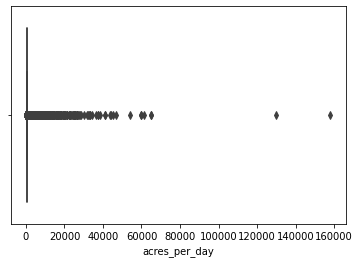

In [36]:
import seaborn as sns
ax = sns.boxplot(data=fires, x = 'acres_per_day')


In [37]:
fires.acres_per_day.head(100)

16      1121.533333
17      1925.000000
25       362.893569
37        50.300000
39       125.000000
           ...     
1344     362.893569
1351     362.893569
1356       6.000000
1358     362.893569
1366     362.893569
Name: acres_per_day, Length: 100, dtype: float64

In [35]:
fires.acres_per_day.fillna(value=fires.acres_per_day.mean(), inplace=True)
fires[['fire_name','full_name','acres_burned','days_burning','acres_per_day']].head()

,fire_name,full_name,acres_burned,days_burning,acres_per_day
16,Power,The Power Fire (2004),16823.0,15.0,1121.533333
17,Freds,The Freds Fire (2004),7700.0,4.0,1925.000000
25,Bachelor,The Bachelor Fire (2004),10.0,0.0,362.893569
37,Howard Gap,The Howard Gap Fire (2005),50.3,1.0,50.300000
39,Austin Creek,The Austin Creek Fire (2005),125.0,1.0,125.000000


## How to add summary columns

In [38]:
fires[['state','days_burning']].head()

,state,days_burning
16,CA,15.0
17,CA,4.0
25,NM,0.0
37,NC,1.0
39,NC,1.0


In [40]:
fires.groupby('state')['days_burning'].mean()

state
AK    32.081535
AL     0.272676
AR     0.400992
AZ     4.887679
CA     5.387197
CO     7.519337
CT     0.315789
DE     0.846154
FL     2.366136
GA     0.338964
HI    34.163265
IA     0.021763
ID    13.331194
IL     0.343750
IN     2.340314
KS     0.533143
KY     0.819139
LA     0.883452
MA     1.027778
MD     0.359447
ME     0.207171
MI     1.212042
MN     1.069301
MO     0.323146
MS     0.152361
MT     9.145593
NC     1.015474
ND     0.308629
NE     0.396947
NH     0.692308
NJ    11.710843
NM     6.085806
NV     3.142025
NY     1.446809
OH     1.066298
OK     0.664489
OR     8.310818
PA     4.429379
PR     1.642857
RI     0.000000
SC     0.607700
SD     0.643005
TN     0.661444
TX     1.000187
UT     5.402306
VA     3.524412
VT     0.375000
WA    13.847343
WI     0.286477
WV     0.807528
WY     7.603335
Name: days_burning, dtype: float64

In [41]:
fires['mean_days'] = fires.groupby('state')['days_burning'].transform(func='mean')
fires[['state','days_burning','mean_days']].head()

,state,days_burning,mean_days
16,CA,15.0,5.387197
17,CA,4.0,5.387197
25,NM,0.0,6.085806
37,NC,1.0,1.015474
39,NC,1.0,1.015474


## How to apply functions to rows or columns

In [42]:
workData = pd.read_pickle('workData.pkl')
workData.head(3)

,sex,region,wrkstat,hrs1,wkcontct,talkspvs,effctsup
id,,,,,,,
2,2,1,1.0,40.0,3.0,4.0,4.0
4,2,1,2.0,20.0,1.0,4.0,4.0
14,2,2,1.0,37.0,1.0,4.0,3.0


In [44]:
workData[["wrkstat","hrs1"]].apply('mean')

wrkstat     1.163918
hrs1       42.083505
dtype: float64

In [45]:
import numpy as np
workData[['sex','hrs1']].apply(np.mean)

sex      1.529897
hrs1    42.083505
dtype: float64

In [46]:
workData['avg_rating'] = workData[
    ['wkcontct','talkspvs','effctsup']].apply(np.mean, axis=1)
workData.head(3)

,sex,region,wrkstat,hrs1,wkcontct,talkspvs,effctsup,avg_rating
id,,,,,,,,
2,2,1,1.0,40.0,3.0,4.0,4.0,3.666667
4,2,1,2.0,20.0,1.0,4.0,4.0,3.000000
14,2,2,1.0,37.0,1.0,4.0,3.0,2.666667


## How to apply user-defined functions

In [47]:
def convert_sex(row):
    if row.sex == 1:
        return 'male'
    elif row.sex == 2:
        return 'female'
    else:
        return 'non-binary'
    
workData['sex'] = workData.apply(convert_sex, axis=1)
workData.head()

,sex,region,wrkstat,hrs1,wkcontct,talkspvs,effctsup,avg_rating
id,,,,,,,,
2,female,1,1.0,40.0,3.0,4.0,4.0,3.666667
4,female,1,2.0,20.0,1.0,4.0,4.0,3.000000
14,female,2,1.0,37.0,1.0,4.0,3.0,2.666667
19,male,1,1.0,50.0,1.0,3.0,4.0,2.666667
21,female,1,1.0,38.0,1.0,4.0,4.0,3.000000


In [48]:
statsoncol (workData,'sex')

,sex
count,970
unique,2
top,female
freq,514


In [52]:
# get the data
gameData = pd.read_pickle('shot_cleaned.pkl')[['game_id','game_date']]
print('before :'+str(len(gameData)))
gameData[gameData.duplicated(keep=False)]
gameData.drop_duplicates(keep='first', inplace=True)
print('after :'+str(len(gameData)))
gameData

before :11753
after :692


,game_id,game_date
0,0020900015,2009-10-28
12,0020900030,2009-10-30
21,0020900069,2009-11-04
27,0020900082,2009-11-06
32,0020900096,2009-11-08
...,...,...
11776,0021801164,2019-04-02
11787,0021801179,2019-04-04
11801,0021801191,2019-04-05
11822,0021801205,2019-04-07


In [53]:
gameData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 11842
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   game_id    692 non-null    object        
 1   game_date  692 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 16.2+ KB


In [54]:
def get_season(row):
    if row.game_date.month > 6:
        season = f'{row.game_date.year}-{row.game_date.year + 1}'
    else:
        season = f'{row.game_date.year - 1}-{row.game_date.year}'
    return season

gameData['season'] = gameData.apply(get_season, axis=1)
with pd.option_context('display.max_rows', 6, 'display.max_columns', None):
    display(gameData)

,game_id,game_date,season
0,0020900015,2009-10-28,2009-2010
12,0020900030,2009-10-30,2009-2010
21,0020900069,2009-11-04,2009-2010
...,...,...,...
11801,0021801191,2019-04-05,2018-2019
11822,0021801205,2019-04-07,2018-2019
11842,0021801215,2019-04-09,2018-2019


## How lambda expressions work with DataFrames

In [55]:
df = pd.DataFrame([[0,1,2],[3,4,5]], columns=['col1','col2','col3'])
df

,col1,col2,col3
0,0,1,2
1,3,4,5


In [56]:
df.apply(lambda x: x.sum() * 2, axis=0)

col1     6
col2    10
col3    14
dtype: int64

In [60]:
df.iloc[:,[0,2]].apply(lambda x: x.sum() * 2, axis=0)

col1     6
col3    14
dtype: int64

In [57]:
df.apply(lambda x: x.sum() * 2, axis=1)

0     6
1    24
dtype: int64

In [61]:
df.iloc[:,[0,2]].apply(lambda x: x.sum() * 2, axis=1)

0     4
1    16
dtype: int64

## How to apply lambda expressions

In [62]:
statsoncol(workData,'wrkstat')

,wrkstat
count,970.000000
mean,1.163918
std,0.370392
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [63]:
workData.wrkstat.value_counts()

1.0    811
2.0    159
Name: wrkstat, dtype: int64

In [64]:
workData['wrkstat'] = workData.apply(
    lambda row: 'full-time' if row.wrkstat == 1.0 else 'part-time', axis=1)
workData.head()

,sex,region,wrkstat,hrs1,wkcontct,talkspvs,effctsup,avg_rating
id,,,,,,,,
2,female,1,full-time,40.0,3.0,4.0,4.0,3.666667
4,female,1,part-time,20.0,1.0,4.0,4.0,3.000000
14,female,2,full-time,37.0,1.0,4.0,3.0,2.666667
19,male,1,full-time,50.0,1.0,3.0,4.0,2.666667
21,female,1,full-time,38.0,1.0,4.0,4.0,3.000000


In [88]:
carsData = pd.read_csv('cars.csv')
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     392 non-null    float64
 1   CYL     392 non-null    int64  
 2   ENG     392 non-null    float64
 3   WGT     392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.4 KB


In [ ]:

carsData['Brand'] = carsData.apply(lambda x: x.CarName.split()[0], axis=1)
carsData[['CarName','Brand']].head()

## How to set or remove an index

In [67]:
fires_by_month = pd.read_pickle('fires_by_month.pkl')

In [68]:
fires_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   state         9300 non-null   category
 1   fire_year     9300 non-null   int64   
 2   fire_month    9300 non-null   int64   
 3   acres_burned  9300 non-null   float64 
 4   days_burning  9300 non-null   float64 
 5   fire_count    9300 non-null   int64   
dtypes: category(1), float64(2), int64(3)
memory usage: 372.9 KB


In [69]:
fires_by_month.set_index('state', inplace=True)
fires_by_month.head(3)

,fire_year,fire_month,acres_burned,days_burning,fire_count
state,,,,,
AK,1992,5,4202.0,135.0,14
AK,1992,6,86401.0,417.0,23
AK,1992,7,48516.7,500.0,26


In [70]:
fires_by_month = pd.read_pickle('fires_by_month.pkl')

In [71]:
fires_by_month.set_index(['state','fire_year','fire_month'], inplace=True)
fires_by_month.head(3)

acres_burned  days_burning  fire_count
state fire_year fire_month                                        
AK    1992      5                 4202.0         135.0          14
                6                86401.0         417.0          23
                7                48516.7         500.0          26

In [72]:
fires_no_index = fires_by_month.reset_index()
fires_no_index.head(3)

,state,fire_year,fire_month,acres_burned,days_burning,fire_count
0,AK,1992,5,4202.0,135.0,14
1,AK,1992,6,86401.0,417.0,23
2,AK,1992,7,48516.7,500.0,26


## How to unstack indexed data

In [73]:
# get indexed dataset
top5_states = pd.read_pickle('top_states.pkl')
top5_states.head(3)

acres_burned  days_burning  fire_count
state fire_year                                        
AK    1992           142444.7        1145.0        68.0
      1993           686630.5        3373.0       144.0
      1994           261604.7        2517.0       126.0

In [74]:
# unstack the state level
top_wide = top5_states[['days_burning','fire_count']].unstack(level='state')
# top_wide = top5_states[['days_burning','fire_count']].unstack(level=0)
top_wide.head(3)

days_burning                             fire_count                \
state               AK      ID     CA    TX     NV         AK     ID     CA   
fire_year                                                                     
1992            1145.0  1375.0  434.0  11.0   88.0       68.0  192.0  819.0   
1993            3373.0   130.0  302.0  39.0   83.0      144.0   33.0  726.0   
1994            2517.0  3039.0  727.0  35.0  235.0      126.0  245.0  720.0   

                        
state        TX     NV  
fire_year               
1992       22.0   65.0  
1993       42.0   62.0  
1994       54.0  109.0

In [75]:
top_wide = top5_states.unstack(level='state')
top_wide.head(3)

acres_burned                                         days_burning  \
state               AK        ID        CA        TX        NV           AK   
fire_year                                                                     
1992          142444.7  683495.2  289254.9   31500.3   92085.1       1145.0   
1993          686630.5    7658.5  315011.1  114265.5   53733.0       3373.0   
1994          261604.7  727133.0  401619.2   69200.2  195645.6       2517.0   

                                      fire_count                             
state          ID     CA    TX     NV         AK     ID     CA    TX     NV  
fire_year                                                                    
1992       1375.0  434.0  11.0   88.0       68.0  192.0  819.0  22.0   65.0  
1993        130.0  302.0  39.0   83.0      144.0   33.0  726.0  42.0   62.0  
1994       3039.0  727.0  35.0  235.0      126.0  245.0  720.0  54.0  109.0

In [76]:
top_wide = top5_states.fire_count.unstack(level='state')
top_wide.head(3)

state,AK,ID,CA,TX,NV
fire_year,,,,,
1992,68.0,192.0,819.0,22.0,65.0
1993,144.0,33.0,726.0,42.0,62.0
1994,126.0,245.0,720.0,54.0,109.0


## How to join DataFrames

In [77]:
# get the shots DataFrame
allShotData = pd.read_pickle('shot_cleaned.pkl')
shots = allShotData.drop(columns=['period','minutes_remaining',
                                  'seconds_remaining','loc_x','loc_y','home_team',
                                  'game_date','shot_attempted_flag','shot_made_flag',
                                  'action_type','visiting_team'])
shots1 = shots.head(2)
shots2 = shots.query('game_id == "0020900030"').head(1)
shots3 = shots.query('game_id == "0020900069"').head(1)
shots = pd.concat([shots1,shots2,shots3], ignore_index=True)
shots.set_index('game_id', inplace = True)
shots

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18
0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24
0020900069,Stephen Curry,Made Shot,3PT Field Goal,25


In [78]:
# get the points_by_game DataFrame
points_by_game = pd.read_pickle('pointsScoredGame.pkl')
points_by_game = points_by_game.query('game_id == "0020900015" or game_id == "0020900030" or game_id == "0020900082"')
points_by_game

,total_score
game_id,
0020900015,14
0020900030,12
0020900082,2


In [79]:
shots_joined = shots.join(points_by_game, how='inner')
shots_joined

,player_name,event_type,shot_type,shot_distance,total_score
game_id,,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26,14
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18,14
0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24,12


In [80]:
points_by_game.join?

Signature:
points_by_game.join(
    other,
    on=None,
    how='left',
    lsuffix='',
    rsuffix='',
    sort=False,
) -> 'DataFrame'
Docstring:
Join columns of another DataFrame.

Join columns with `other` DataFrame either on index or on a key
column. Efficiently join multiple DataFrame objects by index at once by
passing a list.

Parameters
----------
other : DataFrame, Series, or list of DataFrame
    Index should be similar to one of the columns in this one. If a
    Series is passed, its name attribute must be set, and that will be
    used as the column name in the resulting joined DataFrame.
on : str, list of str, or array-like, optional
    Column or index level name(s) in the caller to join on the index
    in `other`, otherwise joins index-on-index. If multiple
    values given, the `other` DataFrame must have a MultiIndex. Can
    pass an array as the join key if it is not already contained in
    the calling DataFrame. Like an Excel VLOOKUP operation.
how : {'left', 'rig

In [82]:
points_by_game

,total_score
game_id,
0020900015,14
0020900030,12
0020900082,2


In [81]:
points_by_game2 = points_by_game.copy(deep='true')
points_by_game2['player_name'] = 'Steph Curry'
points_by_game2

,total_score,player_name
game_id,,
0020900015,14,Steph Curry
0020900030,12,Steph Curry
0020900082,2,Steph Curry


In [83]:
shots_joined = shots.join(points_by_game2, lsuffix='_1', rsuffix='_2', 
                          how='left')
shots_joined

,player_name_1,event_type,shot_type,shot_distance,total_score,player_name_2
game_id,,,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26,14.0,Steph Curry
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18,14.0,Steph Curry
0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24,12.0,Steph Curry
0020900069,Stephen Curry,Made Shot,3PT Field Goal,25,NaN,NaN


In [84]:
shots_joined_outer = shots.join(points_by_game2, lsuffix='_1', 
                                rsuffix='_2', how='outer')
shots_joined_outer

,player_name_1,event_type,shot_type,shot_distance,total_score,player_name_2
game_id,,,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26.0,14.0,Steph Curry
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18.0,14.0,Steph Curry
0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24.0,12.0,Steph Curry
0020900069,Stephen Curry,Made Shot,3PT Field Goal,25.0,NaN,NaN
0020900082,NaN,NaN,NaN,NaN,2.0,Steph Curry


## Merge

In [85]:
shots2 = shots.reset_index()
shots2

,game_id,player_name,event_type,shot_type,shot_distance
0,0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26
1,0020900015,Stephen Curry,Made Shot,2PT Field Goal,18
2,0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24
3,0020900069,Stephen Curry,Made Shot,3PT Field Goal,25


In [86]:
points_by_game2 = points_by_game.reset_index()
points_by_game2

,game_id,total_score
0,0020900015,14
1,0020900030,12
2,0020900082,2


In [87]:
shots_merged = shots2.merge(points_by_game2,  how='cross')
shots_merged

,game_id_x,player_name,event_type,shot_type,shot_distance,game_id_y,total_score
0,0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26,0020900015,14
1,0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26,0020900030,12
2,0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26,0020900082,2
3,0020900015,Stephen Curry,Made Shot,2PT Field Goal,18,0020900015,14
4,0020900015,Stephen Curry,Made Shot,2PT Field Goal,18,0020900030,12
5,0020900015,Stephen Curry,Made Shot,2PT Field Goal,18,0020900082,2
6,0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24,0020900015,14
7,0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24,0020900030,12
8,0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24,0020900082,2
9,0020900069,Stephen Curry,Made Shot,3PT Field Goal,25,0020900015,14


## Concat

In [89]:
fires.head(3)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,full_name,acres_per_day,mean_days
16,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0,The Power Fire (2004),1121.533333,5.387197
17,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0,The Freds Fire (2004),1925.000000,5.387197
25,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0,The Bachelor Fire (2004),362.893569,6.085806


In [90]:
# get the data
top5_fires = fires.sort_values('acres_burned', ascending=False).head(5)
top5_fires = top5_fires.reset_index(drop=True)
top5_fires

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,full_name,acres_per_day,mean_days
0,Inowak,1997,AK,1997-06-25,1997-09-09,606945.0,6,76.0,The Inowak Fire (1997),7986.118421,32.081535
1,Long Draw,2012,OR,2012-07-08,2012-07-30,558198.3,7,22.0,The Long Draw Fire (2012),25372.650000,8.310818
2,Wallow,2011,AZ,2011-05-29,2011-07-12,538049.0,5,44.0,The Wallow Fire (2011),12228.386364,4.887679
3,Boundary,2004,AK,2004-06-13,2004-09-30,537627.0,6,109.0,The Boundary Fire (2004),4932.357798,32.081535
4,Minto Flats South,2009,AK,2009-06-21,2009-09-11,517078.0,6,82.0,The Minto Flats South Fire (2009),6305.829268,32.081535


In [91]:
fires_1 = top5_fires.iloc[:3]
fires_1

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,full_name,acres_per_day,mean_days
0,Inowak,1997,AK,1997-06-25,1997-09-09,606945.0,6,76.0,The Inowak Fire (1997),7986.118421,32.081535
1,Long Draw,2012,OR,2012-07-08,2012-07-30,558198.3,7,22.0,The Long Draw Fire (2012),25372.650000,8.310818
2,Wallow,2011,AZ,2011-05-29,2011-07-12,538049.0,5,44.0,The Wallow Fire (2011),12228.386364,4.887679


In [92]:
fires_2 = top5_fires.iloc[3:]
fires_2.reset_index(drop=True, inplace=True)
fires_2 = fires_2.drop(columns=['fire_month','days_burning'])
fires_2

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,full_name,acres_per_day,mean_days
0,Boundary,2004,AK,2004-06-13,2004-09-30,537627.0,The Boundary Fire (2004),4932.357798,32.081535
1,Minto Flats South,2009,AK,2009-06-21,2009-09-11,517078.0,The Minto Flats South Fire (2009),6305.829268,32.081535


In [93]:
fires_concat = pd.concat([fires_1,fires_2], ignore_index=True)
fires_concat.head(10)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,full_name,acres_per_day,mean_days
0,Inowak,1997,AK,1997-06-25,1997-09-09,606945.0,6.0,76.0,The Inowak Fire (1997),7986.118421,32.081535
1,Long Draw,2012,OR,2012-07-08,2012-07-30,558198.3,7.0,22.0,The Long Draw Fire (2012),25372.650000,8.310818
2,Wallow,2011,AZ,2011-05-29,2011-07-12,538049.0,5.0,44.0,The Wallow Fire (2011),12228.386364,4.887679
3,Boundary,2004,AK,2004-06-13,2004-09-30,537627.0,NaN,NaN,The Boundary Fire (2004),4932.357798,32.081535
4,Minto Flats South,2009,AK,2009-06-21,2009-09-11,517078.0,NaN,NaN,The Minto Flats South Fire (2009),6305.829268,32.081535


## What the SettingWithCopyWarning is warning you about

In [94]:
df = shots.copy(deep=True)

In [95]:
df.head(3)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18
0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24


In [96]:
dfSlice = df.loc['0020900015',:]
dfSlice.loc[:,'player_name'] = 'Curry'

c:\Python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [97]:
dfSlice

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


In [98]:
df.head(3)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18
0020900030,Stephen Curry,Missed Shot,3PT Field Goal,24


In [99]:
dfSlice.head(3)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


## When the SettingWithCopyWarning is given

### Generates the warning but no corruption

In [100]:
df = shots.copy(deep=True)

In [101]:
dfSlice = df.query('game_id == "0020900015"')
dfSlice.loc[:,'player_name'] = 'Curry'
df.head(2)

c:\Python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18


In [102]:
dfSlice.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


#### How use the copy() method to stop the warning message

In [103]:
dfFixed = df.query('game_id == "0020900015"').copy()
dfFixed.loc[:,'player_name'] = 'Curry'

### Generates the warning and corrupts the data

In [104]:
df = shots.copy(deep=True)

In [105]:
dfSlice = df.loc['0020900015',:]
dfSlice.loc[:,'player_name'] = 'Curry'
df.head(2)

c:\Python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


In [106]:
dfSlice.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


#### How to fix this code

In [107]:
df = shots.copy(deep=True)

In [108]:
dfFixed = df.loc['0020900015',:].copy()
dfFixed.loc[:,'player_name'] = 'Curry'
df.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18


In [109]:
dfFixed.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


## When the SettingWithCopyWarning isn’t given

In [110]:
df = shots.copy(deep=True)

In [111]:
dfSlice = df
dfSlice.loc[:,'player_name'] = 'Curry'
df.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


In [112]:
dfSlice.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18


### How to fix this code

In [113]:
df = shots.copy(deep=True)

In [114]:
dfFixed = df.copy()
dfFixed.loc[:,'player_name'] = 'Curry'
df.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Stephen Curry,Missed Shot,3PT Field Goal,26
0020900015,Stephen Curry,Made Shot,2PT Field Goal,18


In [115]:
dfFixed.head(2)

,player_name,event_type,shot_type,shot_distance
game_id,,,,
0020900015,Curry,Missed Shot,3PT Field Goal,26
0020900015,Curry,Made Shot,2PT Field Goal,18
